<a href="https://colab.research.google.com/github/codingbjs/DeepLearning/blob/main/Deep_Neural_Network_DNN/DNN_Boston_Regression_Analysis_EarlyStopping_CPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow as tf

tf.__version__


'2.13.0'

In [ ]:
tf.test.gpu_device_name()

''

In [ ]:
from tensorflow.keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) =  boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train[:10])
print(y_test[:10])


(404, 13)
(102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]
[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2]


In [ ]:
mean = X_train.mean(axis = 0)
std = X_train.std(axis = 0)
X_train = X_train - mean
X_train = X_train / std
X_test = X_test - mean
X_test = X_test / std


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size = 0.2,
                                                      random_state = 2045)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((258, 13), (65, 13), (258,), (65,))

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

boston = models.Sequential(name = 'Regression')
boston.add(layers.Dense(64, activation = 'relu', input_shape = (13,)))
boston.add(layers.Dense(64, activation = 'relu'))
boston.add(layers.Dense(1))


In [ ]:
boston.summary()


Model: "Regression"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5121 (20.00 KB)
Trainable params: 5121 (20.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
boston.compile(loss = 'mse',
               optimizer = 'rmsprop',
               metrics = ['mae'])

In [ ]:
%%time
Hist_boston = boston.fit(X_train, y_train,
                         epochs = 500,
                         batch_size = 1,
                         validation_data = (X_valid, y_valid))


Epoch 1/500
258/258 [==============================] - 1s 3ms/step - loss: 174.0392 - mae: 10.3251 - val_loss: 46.0746 - val_mae: 4.6175
Epoch 2/500
258/258 [==============================] - 1s 2ms/step - loss: 25.8032 - mae: 3.5968 - val_loss: 34.5251 - val_mae: 4.1127
Epoch 3/500
258/258 [==============================] - 1s 2ms/step - loss: 19.7636 - mae: 3.1286 - val_loss: 25.6310 - val_mae: 3.5462
Epoch 4/500
258/258 [==============================] - 1s 2ms/step - loss: 15.8627 - mae: 2.7088 - val_loss: 22.3000 - val_mae: 3.3437
Epoch 5/500
258/258 [==============================] - 1s 2ms/step - loss: 14.8902 - mae: 2.5764 - val_loss: 21.2981 - val_mae: 3.2379
Epoch 6/500
258/258 [==============================] - 1s 2ms/step - loss: 14.2281 - mae: 2.5113 - val_loss: 19.4990 - val_mae: 3.1269
Epoch 7/500
258/258 [==============================] - 1s 2ms/step - loss: 12.8893 - mae: 2.3994 - val_loss: 17.1454 - val_mae: 2.9469
Epoch 8/500
258/258 [==============================] 

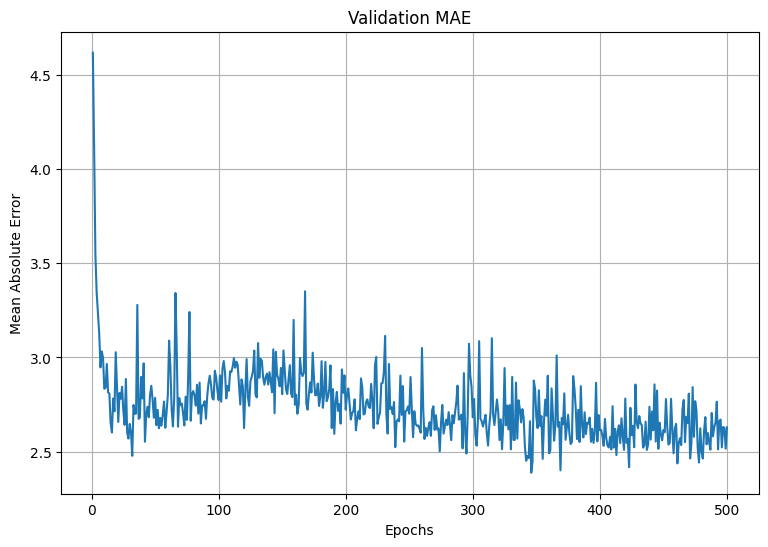

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_boston.history['val_mae']) + 1)
plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_boston.history['val_mae'])
plt.title('Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.show()


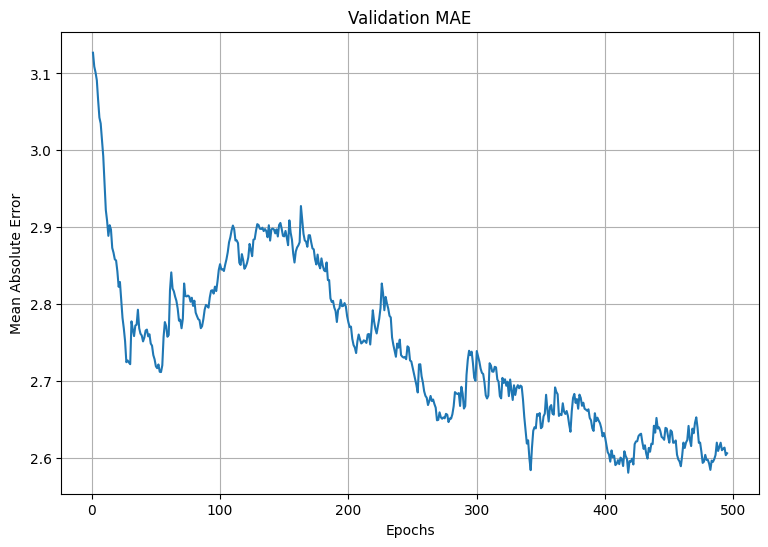

In [ ]:
def smooth_curve(points, factor = 0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
mae_history = Hist_boston.history['val_mae']
mae_history = smooth_curve(mae_history[5:])
plt.figure(figsize = (9, 6))
plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.title('Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.show()

In [ ]:
test_mse_score, test_mae_score = boston.evaluate(X_test, y_test)
print('MAE is :',test_mae_score)


4/4 [==============================] - 0s 11ms/step - loss: 19.8387 - mae: 2.8243
MAE is : 2.824338436126709


In [ ]:
from tensorflow.keras import backend as K

K.clear_session()


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

boston = models.Sequential(name = 'EarlyStopping')
boston.add(layers.Dense(64, activation = 'relu', input_shape = (13,)))
boston.add(layers.Dense(64, activation = 'relu'))
boston.add(layers.Dense(1))
boston.compile(loss = 'mse',
               optimizer = 'rmsprop',
               metrics = ['mae'])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_mae',
                   mode = 'min',
                   patience = 50,
                   verbose = 1)


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint('best_boston.h5',
                     monitor = 'val_mae',
                     mode = 'min',
                     save_best_only = True,
                     verbose = 1)


In [ ]:
%%time

Hist_boston = boston.fit(X_train, y_train,
                         epochs = 500,
                         batch_size = 1,
                         validation_data = (X_valid, y_valid),
                         callbacks = [es, mc],
                         verbose = 1)


Epoch 1/500
230/258 [=========================>....] - ETA: 0s - loss: 225.1970 - mae: 11.9768
Epoch 1: val_mae improved from inf to 3.93827, saving model to best_boston.h5
258/258 [==============================] - 1s 3ms/step - loss: 202.4407 - mae: 10.9890 - val_loss: 34.8531 - val_mae: 3.9383
Epoch 2/500
244/258 [===========================>..] - ETA: 0s - loss: 24.1255 - mae: 3.2975
Epoch 2: val_mae improved from 3.93827 to 3.42744, saving model to best_boston.h5
258/258 [==============================] - 1s 2ms/step - loss: 23.3110 - mae: 3.2555 - val_loss: 25.6717 - val_mae: 3.4274
Epoch 3/500
253/258 [============================>.] - ETA: 0s - loss: 17.7459 - mae: 2.9518
Epoch 3: val_mae improved from 3.42744 to 3.33161, saving model to best_boston.h5
258/258 [==============================] - 1s 2ms/step - loss: 17.4702 - mae: 2.9271 - val_loss: 23.1126 - val_mae: 3.3316
Epoch 4/500
256/258 [============================>.] - ETA: 0s - loss: 15.3773 - mae: 2.6040
Epoch 4: val_

In [ ]:
!ls -l


total 72
-rw-r--r-- 1 root root 65840 Oct 12 01:23 best_boston.h5
drwxr-xr-x 1 root root  4096 Oct 10 13:28 sample_data


In [ ]:
from tensorflow.keras.models import load_model

best_boston = load_model('best_boston.h5')


In [ ]:
test_mse_score, test_mae_score = best_boston.evaluate(X_test, y_test, verbose = 0)
print('MAE is :',test_mae_score)


MAE is : 2.7335870265960693
